In [68]:
# pip install pygraphviz


  Using cached pygraphviz-1.12.tar.gz (104 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [56 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-11.1-arm64-cpython-311
      creating build/lib.macosx-11.1-arm64-cpython-311/pygraphviz
      copying pygraphviz/scraper.py -> build/lib.macosx-11.1-arm64-cpython-311/pygraphviz
      copying pygraphviz/graphviz.py -> build/lib.macosx-11.1-arm64-cpython-311/pygraphviz
      copying pygraphviz/__init__.py -> build/lib.macosx-11.1-arm64-cpython-311/pygraphviz
      copying pygraphviz/agraph.py -> build/lib.macosx-11.1-arm64-cpython-311/pygraphviz
      copying pygraphviz/testing.py -> bu

In [3]:
from networkx.drawing.nx_agraph import graphviz_layout

In [5]:
# pip install pygraphviz

  Using cached pygraphviz-1.12.tar.gz (104 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [56 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-11.1-arm64-cpython-311
      creating build/lib.macosx-11.1-arm64-cpython-311/pygraphviz
      copying pygraphviz/scraper.py -> build/lib.macosx-11.1-arm64-cpython-311/pygraphviz
      copying pygraphviz/graphviz.py -> build/lib.macosx-11.1-arm64-cpython-311/pygraphviz
      copying pygraphviz/__init__.py -> build/lib.macosx-11.1-arm64-cpython-311/pygraphviz
      copying pygraphviz/agraph.py -> build/lib.macosx-11.1-arm64-cpython-311/pygraphviz
      copying pygraphviz/testing.py -> bu

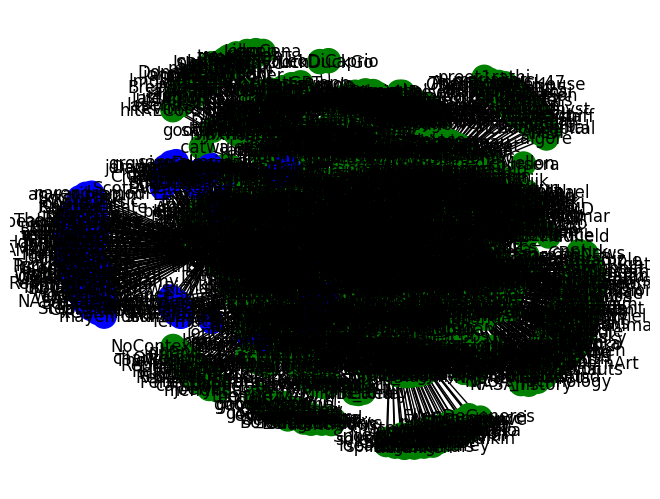

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def load_data(file_path):
    return pd.read_excel(file_path)

def build_graph(data):
    G = nx.DiGraph()
    for _, row in data[['screenName_fo', 'screenName_kol']].dropna().iterrows():
        G.add_node(row['screenName_fo'])
        G.add_edge(row['screenName_kol'], row['screenName_fo'])  # KOL -> follower
    return G

def edge_to_remove(G):
    edge_dict = nx.edge_betweenness_centrality(G)
    edge = max(edge_dict, key=edge_dict.get)  # Get the edge with highest centrality
    return edge

def girvan_newman(G):
    sg = nx.connected_components(G)
    sg_count = nx.number_connected_components(G)
    while sg_count == 1:
        G.remove_edge(*edge_to_remove(G))  # Unpack the tuple and remove the edge
        sg = nx.connected_components(G)
        sg_count = nx.number_connected_components(G)
    return sg

# def draw_graph(G, node_groups):
#     color_map = []
#     for node in G:
#         if node in node_groups[0]:
#             color_map.append('blue')
#         else:
#             color_map.append('green')
#     nx.draw(G, node_color=color_map, with_labels=True)
#     plt.show()
def draw_improved_graph(G, communities):
    plt.figure(figsize=(20, 20))
    # 使用 Graphviz 布局
    pos = graphviz_layout(G, prog='neato')
    
    # 根据社区分配颜色
    color_map = []
    for node in G:
        for i, community in enumerate(communities):
            if node in community:
                color_map.append(f"C{i}")
                break
        else:
            color_map.append("black")  # 如果节点不在列表中的社区

    # 画节点
    nx.draw_networkx_nodes(G, pos, node_color=color_map, alpha=0.5)
    # 画边
    nx.draw_networkx_edges(G, pos, alpha=0.1)
    # 画标签
    nx.draw_networkx_labels(G, pos, font_size=8, alpha=0.6)
    
    plt.axis('off')
    plt.show()

def main(file_path):
    data = load_data(file_path)
    G = build_graph(data).to_undirected()  # Girvan-Newman requires an undirected graph
    communities = girvan_newman(G.copy())
    node_groups = [list(group) for group in communities]
    draw_graph(G, node_groups)

if __name__ == "__main__":
    file_path = 'final_dataset.xlsx'  # Change to your file path
    main(file_path)


In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def load_data(file_path):
    return pd.read_excel(file_path)

def build_graph(data):
    G = nx.DiGraph()
    for _, row in data[['screenName_fo', 'screenName_kol']].dropna().iterrows():
        G.add_node(row['screenName_fo'])
        G.add_edge(row['screenName_kol'], row['screenName_fo'])  # KOL -> follower
    return G

def edge_to_remove(G):
    edge_dict = nx.edge_betweenness_centrality(G)
    edge = max(edge_dict, key=edge_dict.get)  # Get the edge with highest centrality
    return edge

def girvan_newman(G, limit=5):
    sg = nx.connected_components(G)
    sg_count = nx.number_connected_components(G)
    while sg_count < limit:
        G.remove_edge(*edge_to_remove(G))
        sg = nx.connected_components(G)
        sg_count = nx.number_connected_components(G)
    return list(sg)

def draw_graph(G, communities):
    plt.figure(figsize=(20, 20))
    pos = graphviz_layout(G, prog='neato')
    color_map = []
    for community in communities:
        color_map.extend([f"C{i}" for i, _ in enumerate(community)])
    nx.draw_networkx_nodes(G, pos, node_color=color_map, alpha=0.5)
    nx.draw_networkx_edges(G, pos, alpha=0.1)
    nx.draw_networkx_labels(G, pos, font_size=8, alpha=0.6)
    plt.axis('off')
    plt.show()

def main(file_path):
    data = load_data(file_path)
    G = build_graph(data).to_undirected()
    communities = girvan_newman(G.copy(), limit=5)  # 设置社区数量的限制
    draw_graph(G, communities)

if __name__ == "__main__":
    file_path = 'final_dataset.xlsx'  # Change to your file path
    main(file_path)

ImportError: requires pygraphviz http://pygraphviz.github.io/

<Figure size 2000x2000 with 0 Axes>

In [6]:
import pandas as pd
data=pd.read_excel('final_dataset.xlsx')

In [8]:
# 显示 `highest_level_org` 字段中的一些唯一值
unique_orgs = data['highest_level_org'].dropna().unique()
unique_orgs[:50]


array(['Google', 'New York Times', 'Here Comes The Guillotine Podcast',
       'World Wrestling Entertainment', 'Government', 'NewYorker',
       'New York Magazine', 'US Food and Drug Administration',
       'Broad Institute', 'University of Maryland',
       'Carnegie Mellon University', "Ohio's Fourth District",
       'Brownstone Fellow', 'CNN', 'Revolution', 'Zeteo News',
       'ARKInvest', 'Geometric Intelligence',
       'Martian Ministry of Sthytix', 'Open Philanthropy', 'Flexport',
       'NousResearch', 'Conservatives', 'University of Toronto',
       'University of Oxford', 'Techmeme', 'LightningAI', 'isodope',
       'Humanity Forward', 'PWVentures', 'OpenAI',
       'Algorithmic Justice League', 'Amazon', 'Stanford University',
       'OpenReview', 'Optum', 'Google Ventures', 'Tufts University',
       'Good Steward Partners', 'Multiplex Magazine', 'Waabi_ai',
       'Deepmind', 'Cohere', 'Bloomberg', 'Radical Ventures',
       'McRock Capital', 'Retool', 'TakeoffAI', 'bl

In [39]:
def categorize_org(org):
    org = org.lower()
    # 判断是否为科学家组织
    if any(keyword in org for keyword in ['univ', 'institut', 'research']):
        return 'Scientist Org'
    # 判断是否为创业者组织
    elif any(keyword in org for keyword in ['ai']):
        return 'Entrepreneur Org'
    # 如果都不匹配，归类为 'Other'
    else:
        return 'Other'


# 应用这个函数到 highest_level_org 字段
data['org_category'] = data['highest_level_org'].fillna('').apply(categorize_org)

# 创建科学家和创业组织的子集
scientist_data = data[data['org_category'] == 'Scientist Org']
entrepreneur_data = data[data['org_category'] == 'Entrepreneur Org']

# 显示分类后的数据的基本信息
scientist_data.shape, entrepreneur_data.shape


((425, 39), (454, 39))

In [44]:
scientist_data.to_csv('scientist_data.csv')

In [40]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
# 重新创建科学家组织和创业组织的网络图
G_scientist = nx.DiGraph()
for index, row in scientist_data.iterrows():
    G_scientist.add_node(row['screenName_fo'], label=row['name_fo'])
    G_scientist.add_edge(row['screenName_kol'], row['screenName_fo'])

G_entrepreneur = nx.DiGraph()
for index, row in entrepreneur_data.iterrows():
    G_entrepreneur.add_node(row['screenName_fo'], label=row['name_fo'])
    G_entrepreneur.add_edge(row['screenName_kol'], row['screenName_fo'])

# 将有向图转化为无向图

undirected_scientist_G = G_scientist.to_undirected()
undirected_entrepreneur_G = G_entrepreneur.to_undirected()

# 应用社区检测
communities_scientist = greedy_modularity_communities(undirected_scientist_G)
communities_entrepreneur = greedy_modularity_communities(undirected_entrepreneur_G)

# 计算各自社区的数量
scientist_community_count = len(communities_scientist)
entrepreneur_community_count = len(communities_entrepreneur)

scientist_community_count, entrepreneur_community_count


(5, 6)

In [43]:
for index, row in scientist_data.iterrows():
    print(f"Adding node: {row['screenName_fo']}, edge from: {row['screenName_kol']} to {row['screenName_fo']}")
    G_scientist.add_node(row['screenName_fo'], label=row['name_fo'])
    G_scientist.add_edge(row['screenName_kol'], row['screenName_fo'])


Adding node: EricLander46, edge from: drfeifei to EricLander46
Adding node: EricLander46, edge from: demishassabis to EricLander46
Adding node: haldaume3, edge from: ylecun to haldaume3
Adding node: haldaume3, edge from: rsalakhu to haldaume3
Adding node: haldaume3, edge from: karpathy to haldaume3
Adding node: haldaume3, edge from: goodfellow_ian to haldaume3
Adding node: haldaume3, edge from: AndrewYNg to haldaume3
Adding node: KofmanMichael, edge from: drfeifei to KofmanMichael
Adding node: KofmanMichael, edge from: AndrewYNg to KofmanMichael
Adding node: Teknium1, edge from: karpathy to Teknium1
Adding node: Teknium1, edge from: AndrewYNg to Teknium1
Adding node: roydanroy, edge from: ylecun to roydanroy
Adding node: roydanroy, edge from: rsalakhu to roydanroy
Adding node: roydanroy, edge from: goodfellow_ian to roydanroy
Adding node: roydanroy, edge from: geoffreyhinton to roydanroy
Adding node: SandraWachter5, edge from: mustafasuleyman to SandraWachter5
Adding node: SandraWachte

In [41]:
communities_scientist

[frozenset({'AdamMGrant',
            'AndrewYNg',
            'Azaliamirh',
            'ChrisBaldassano',
            'DorsaSadigh',
            'EmmaBrunskill',
            'EricLander46',
            'KofmanMichael',
            'LizSpecht',
            'McFaul',
            'MelMitchell1',
            'ShannonVallor',
            'StefanoErmon',
            'abe_verghese',
            'chrispiech',
            'curtlanglotz',
            'deanpomerleau',
            'demishassabis',
            'drfeifei',
            'drnigam',
            'eric_lander',
            'frossi_t',
            'gneubig',
            'kjgeras',
            'landay',
            'leto__jean',
            'mehran_sahami',
            'mkearnsupenn',
            'msbernst',
            'nlpnoah',
            'pathak2206',
            'percyliang',
            'random_walker',
            'ronlivs',
            'ryan_p_adams',
            'sanmikoyejo',
            'tengyuma',
            'terahlyons',
  

/Users/yvette/anaconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


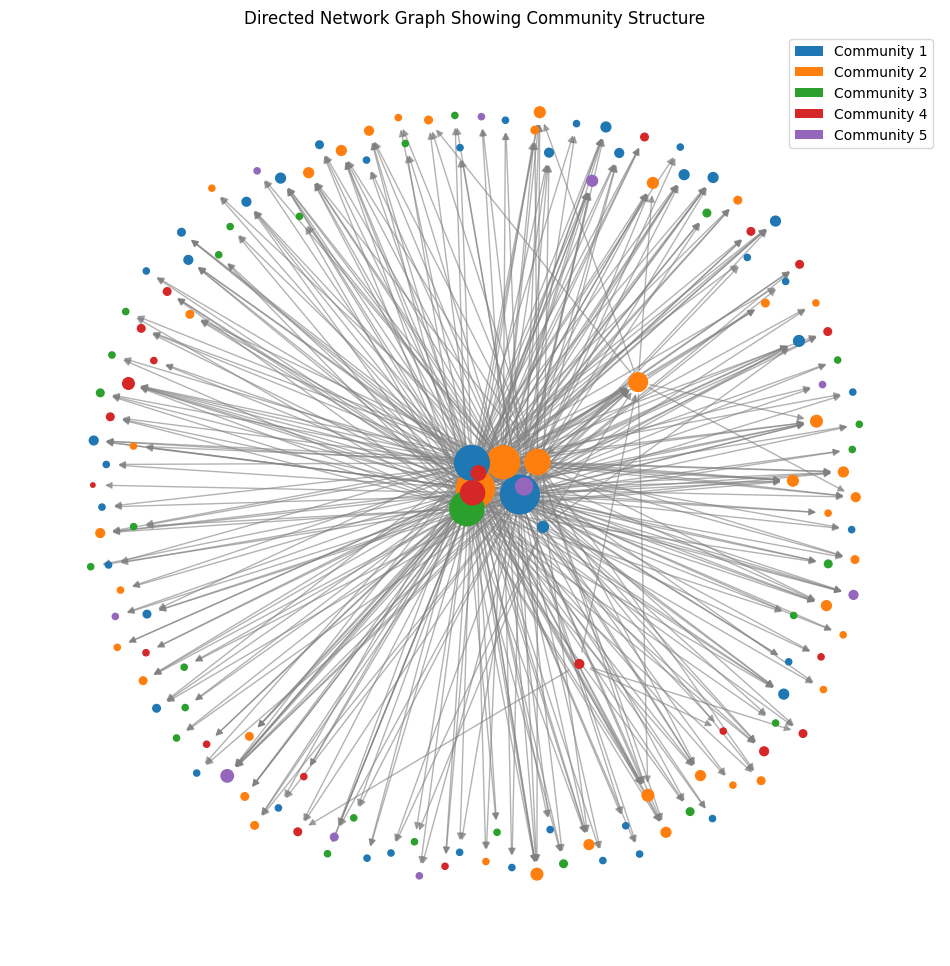

In [33]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def draw_directed_community_graph(G, communities):
    # 创建一个颜色映射，每个社区一种颜色
    community_colors = {node: f"C{i}" for i, community in enumerate(communities) for node in community}
    colors = [community_colors.get(node, "C0") for node in G.nodes()]
    
    # 节点的大小根据其度数来调整
    sizes = [G.degree(node) * 10 for node in G.nodes()]
    
    # 使用 spring layout
    pos = nx.spring_layout(G)
    
    # 绘制有向网络图
    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=sizes, cmap=plt.cm.jet)
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10, edge_color='gray', alpha=0.6)
    
    # 创建一个图例
    legend_handles = [Patch(facecolor=f"C{i}", label=f"Community {i+1}") for i in range(len(communities))]
    plt.legend(handles=legend_handles, loc='upper right')
    
    plt.title("Directed Network Graph Showing Community Structure")
    plt.axis('off')  # Turn off the axis
    plt.show()
# 绘制有向的科学家组织的网络图
draw_directed_community_graph(G_scientist, communities_scientist)

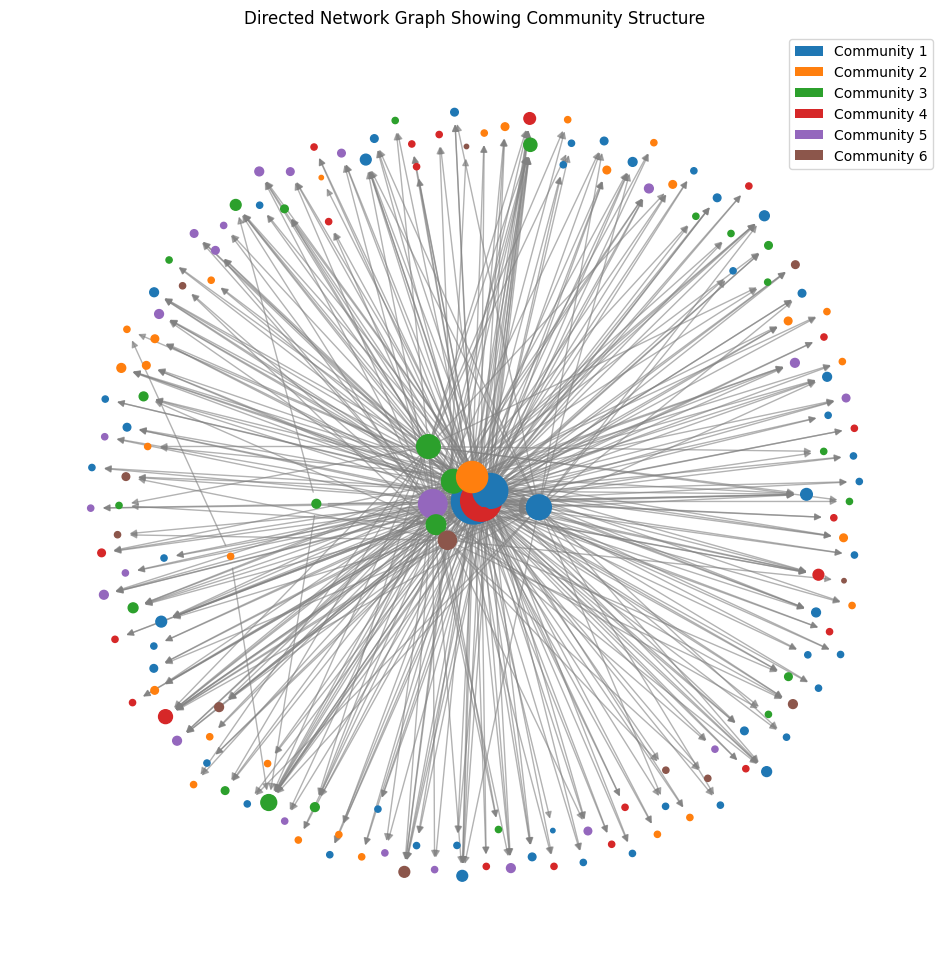

In [34]:
# 绘制有向的创业组织的网络图
draw_directed_community_graph(G_entrepreneur, communities_entrepreneur)


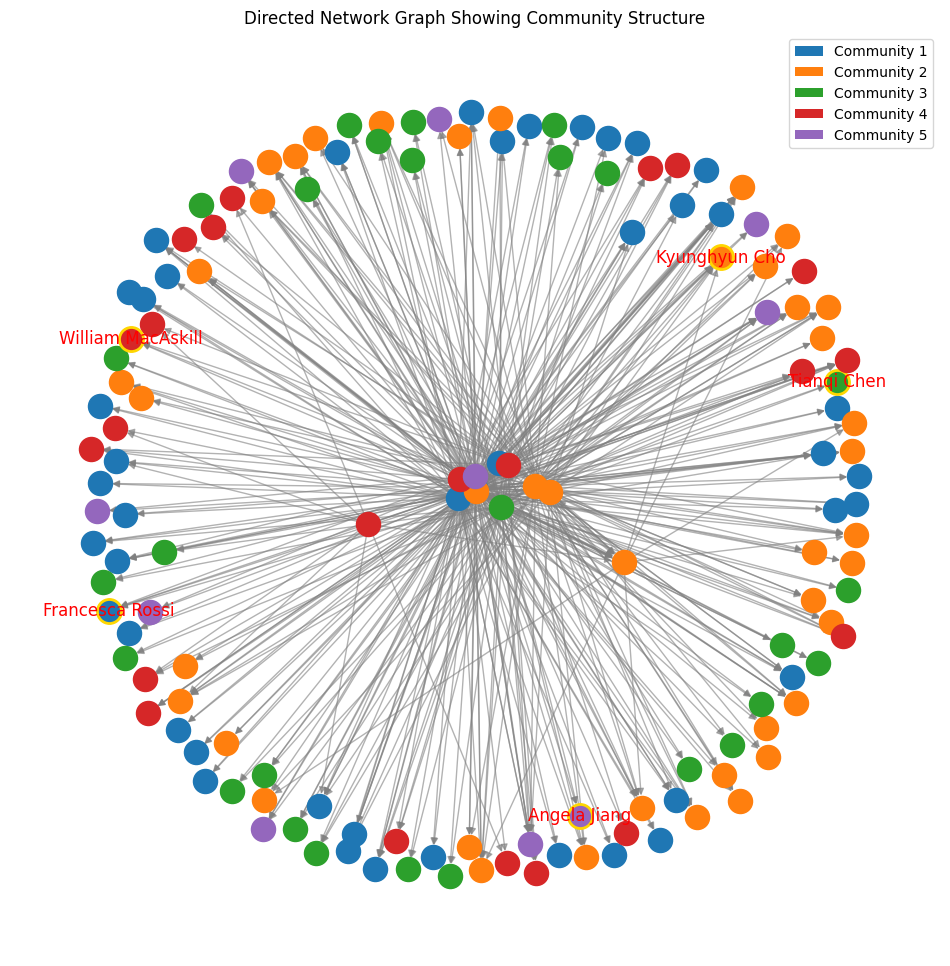

In [45]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def draw_directed_community_graph(G, communities):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)  # 使用 spring layout

    # 绘制所有节点和边，先不指定颜色
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10, edge_color='gray', alpha=0.6)
    
    # 处理每个社区
    for i, community in enumerate(communities):
        # 找到每个社区的中心节点
        subgraph = G.subgraph(community)
        in_degrees = subgraph.in_degree()
        # 中心节点是入度最高的节点
        center_node = max(in_degrees, key=lambda x: x[1])[0]

        # 绘制社区节点
        nx.draw_networkx_nodes(subgraph, pos, node_color=f"C{i}", label=f"Community {i+1}")

        # 特别标注中心节点
        nx.draw_networkx_nodes(subgraph, pos, nodelist=[center_node], node_color=f"C{i}", node_size=300, edgecolors='gold', linewidths=2)
        # 在中心节点旁边添加标签
        nx.draw_networkx_labels(subgraph, pos, labels={center_node: G.nodes[center_node]['label']}, font_color='red')

    # 创建一个图例
    legend_handles = [Patch(facecolor=f"C{i}", label=f"Community {i+1}") for i in range(len(communities))]
    plt.legend(handles=legend_handles, loc='upper right')
    
    plt.title("Directed Network Graph Showing Community Structure")
    plt.axis('off')  # Turn off the axis
    plt.show()

# 使用示例
draw_directed_community_graph(G_scientist, communities_scientist)


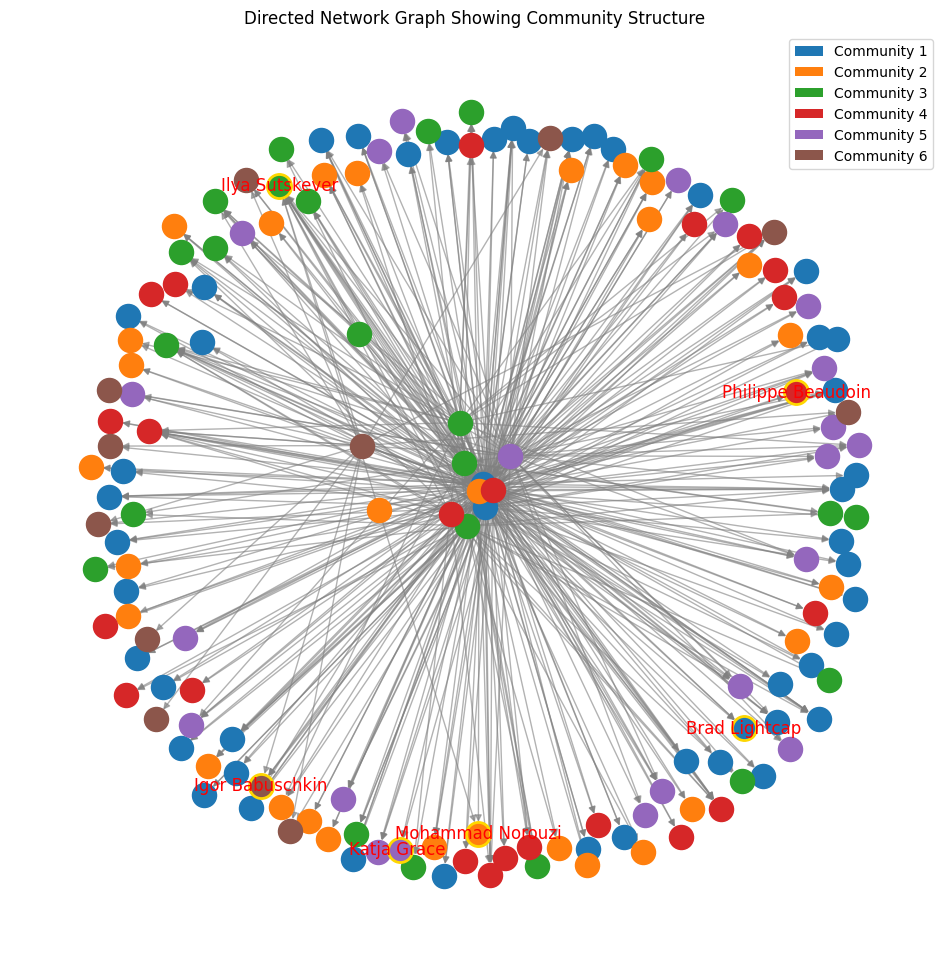

In [46]:
draw_directed_community_graph(G_entrepreneur, communities_entrepreneur)

In [54]:
# 选择有地理位置信息的子集
# 确保 'screenName_kol' 和 'screenName_fo' 没有 NaN 值
data_filtered = data[data['screenName_kol'].notna() & data['screenName_fo'].notna()]

# 选择有地理位置信息的子集
data_filtered = data_filtered[data_filtered['location_cleansed'].notna()]

# 简化数据集，只保留必要的列
data_simplified = data_filtered[['screenName_kol', 'screenName_fo', 'location_cleansed']]

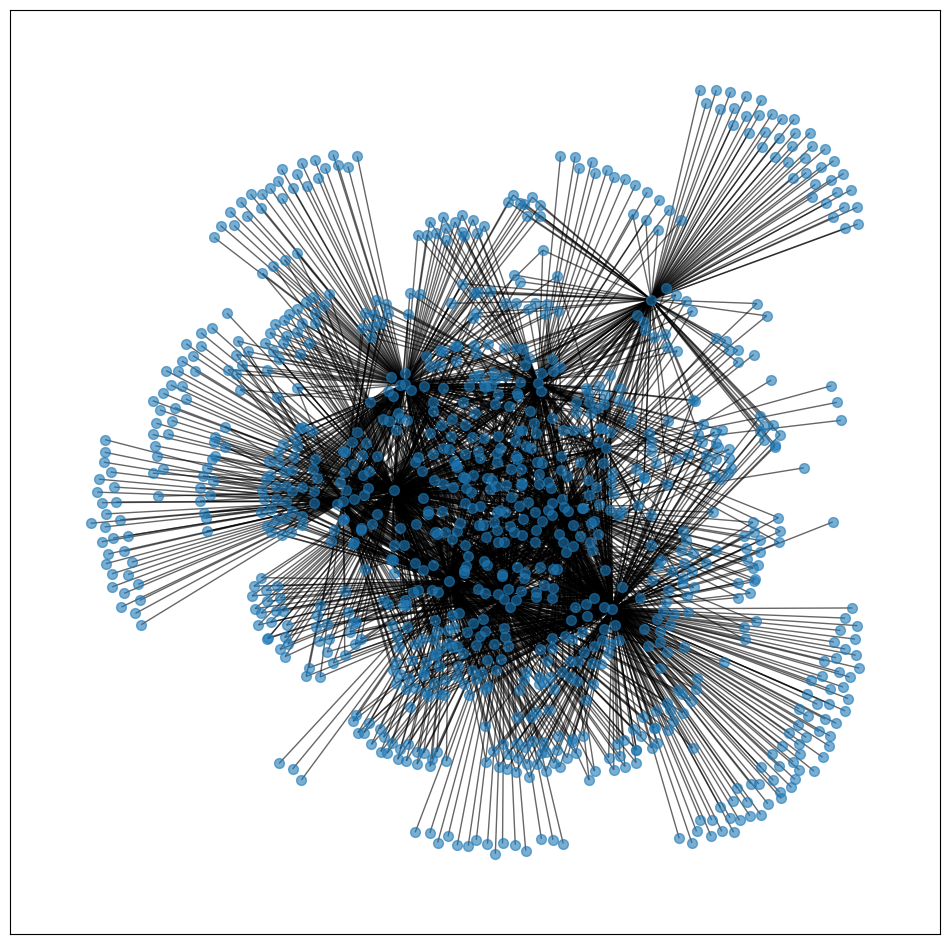

In [55]:
# 创建一个图
G = nx.Graph()

# 添加节点和边
for index, row in data_simplified.iterrows():
    G.add_node(row['screenName_kol'], type='influencer', location=row['location_cleansed'])
    G.add_node(row['screenName_fo'], type='follower', location=row['location_cleansed'])
    G.add_edge(row['screenName_kol'], row['screenName_fo'])

# 可视化网络
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos, node_size=50, alpha=0.6, with_labels=False)
plt.show()


In [56]:
from networkx.algorithms.community import girvan_newman

# 应用Girvan-Newman算法
communities = girvan_newman(G)

# 输出第一个社区划分的结果
first_community = next(communities)
sorted(map(sorted, first_community))


[['7homaslin',
  'ABC',
  'ACLU',
  'AINowInstitute',
  'AMD',
  'AOC',
  'AP_Politics',
  'APompliano',
  'ARKInvest',
  'AVindman',
  'AdamMGrant',
  'AjdDavison',
  'AlecRad',
  'AlexAlahi',
  'AmandaAskell',
  'AndrewYNg',
  'AndrewYang',
  'AravSrinivas',
  'ArthurGretton',
  'BBCNews',
  'BBCWorld',
  'BW',
  'BachFrancis',
  'BaiduResearch',
  'BarackObama',
  'BenMildenhall',
  'Benioff',
  'BernieSanders',
  'BillClinton',
  'BillGates',
  'BillNye',
  'Bill_Gross',
  'Bob_Wachter',
  'BorisMPower',
  'BotJunkie',
  'BretWeinstein',
  'CACMmag',
  'CAIS_USC',
  'CBSNews',
  'CDCgov',
  'CGTNOfficial',
  'CNBC',
  'CSDatCMU',
  'CSETGeorgetown',
  'CVPR',
  'CadeMetz',
  'CaimingXiong',
  'CarnegieMellon',
  'Casey',
  'CaseyNewton',
  'CatClifford',
  'CathieDWood',
  'Channel4News',
  'ChrSzegedy',
  'ChrisBaldassano',
  'ClementDelangue',
  'CollinBurns4',
  'ComputerHistory',
  'CondoleezzaRice',
  'CovariantAI',
  'DARPA',
  'DKeithClimate',
  'DalaiLama',
  'DanHendrycks'

/var/folders/44/qlcp6s1x0dj50t76wqx6l6rr0000gn/T/ipykernel_3416/2697369799.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw_networkx(G, pos, node_color=colors, with_labels=False, node_size=50, cmap=cm.get_cmap('viridis'))


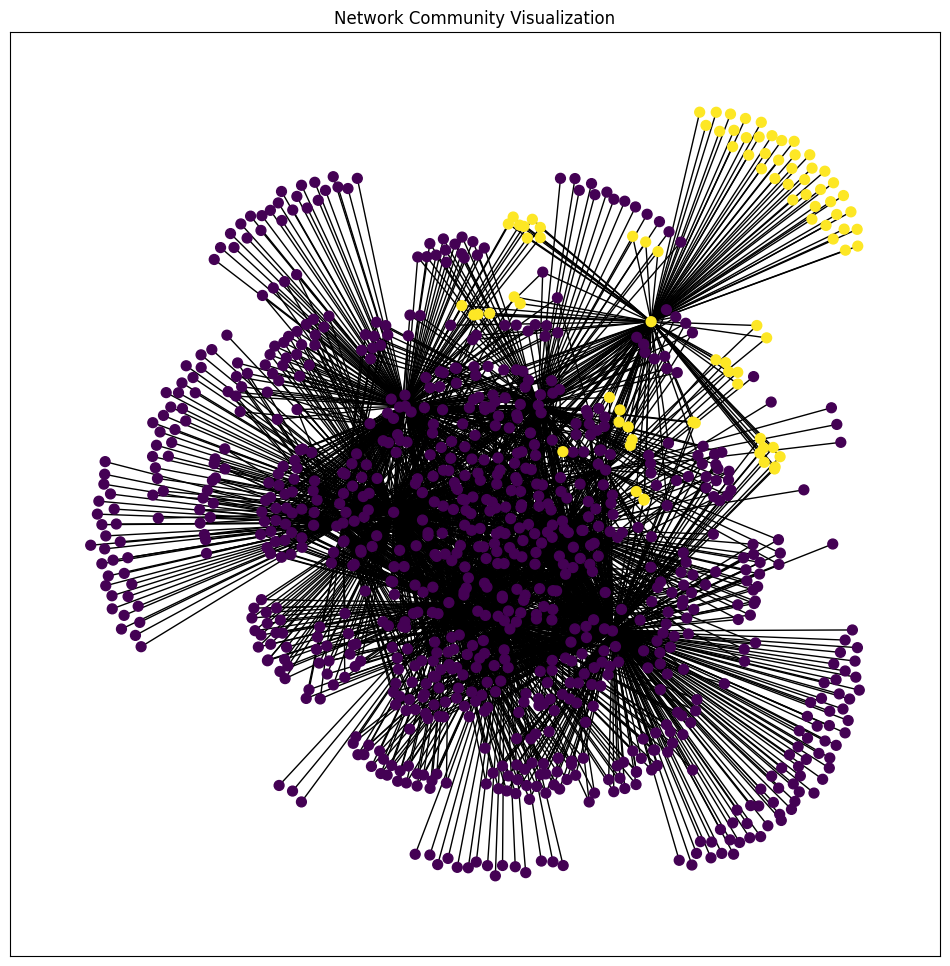

In [57]:
import matplotlib.cm as cm

# 给每个社区分配颜色
community_map = {node: i for i, community in enumerate(first_community) for node in community}
colors = [community_map[node] for node in G.nodes()]

# 可视化网络并根据社区着色
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos, node_color=colors, with_labels=False, node_size=50, cmap=cm.get_cmap('viridis'))
plt.title('Network Community Visualization')
plt.show()


In [61]:
import networkx as nx
from networkx.algorithms.community import girvan_newman
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 假设 G 是已经构建好的图
communities_generator = girvan_newman(G)

# 定义一个列表来存储每个迭代步骤的社区
community_levels = []

# 最多迭代5次
for level in range(5):
    try:
        # 每次迭代产生的社区
        communities = next(communities_generator)
        community_levels.append(communities)
        print(f"Iteration {level + 1}: Number of communities = {len(communities)}")
    except StopIteration:
        print("No more splits possible.")
        break

# 可视化最后一次迭代的社区划分结果
final_communities = community_levels[-1]
sorted_communities = sorted(map(sorted, final_communities))
print(f"Final communities: {sorted_communities}")


Iteration 1: Number of communities = 2
Iteration 2: Number of communities = 3
Iteration 3: Number of communities = 4
Iteration 4: Number of communities = 5
Iteration 5: Number of communities = 6
Final communities: [['7homaslin', 'ABC', 'ACLU', 'AINowInstitute', 'AMD', 'AOC', 'AP_Politics', 'APompliano', 'ARKInvest', 'AVindman', 'AdamMGrant', 'AjdDavison', 'AlecRad', 'AlexAlahi', 'AmandaAskell', 'AndrewYNg', 'AndrewYang', 'AravSrinivas', 'ArthurGretton', 'BBCNews', 'BBCWorld', 'BW', 'BachFrancis', 'BaiduResearch', 'BarackObama', 'BenMildenhall', 'Benioff', 'BernieSanders', 'BillClinton', 'BillGates', 'BillNye', 'Bill_Gross', 'Bob_Wachter', 'BorisMPower', 'BotJunkie', 'BretWeinstein', 'CACMmag', 'CAIS_USC', 'CBSNews', 'CDCgov', 'CGTNOfficial', 'CNBC', 'CSDatCMU', 'CSETGeorgetown', 'CVPR', 'CadeMetz', 'CaimingXiong', 'CarnegieMellon', 'Casey', 'CaseyNewton', 'CatClifford', 'CathieDWood', 'Channel4News', 'ChrSzegedy', 'ChrisBaldassano', 'ClementDelangue', 'CollinBurns4', 'ComputerHistory',

/var/folders/44/qlcp6s1x0dj50t76wqx6l6rr0000gn/T/ipykernel_3416/3881525301.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw_networkx(G, pos, node_color=colors, with_labels=False, node_size=100, cmap=cm.get_cmap('viridis'))


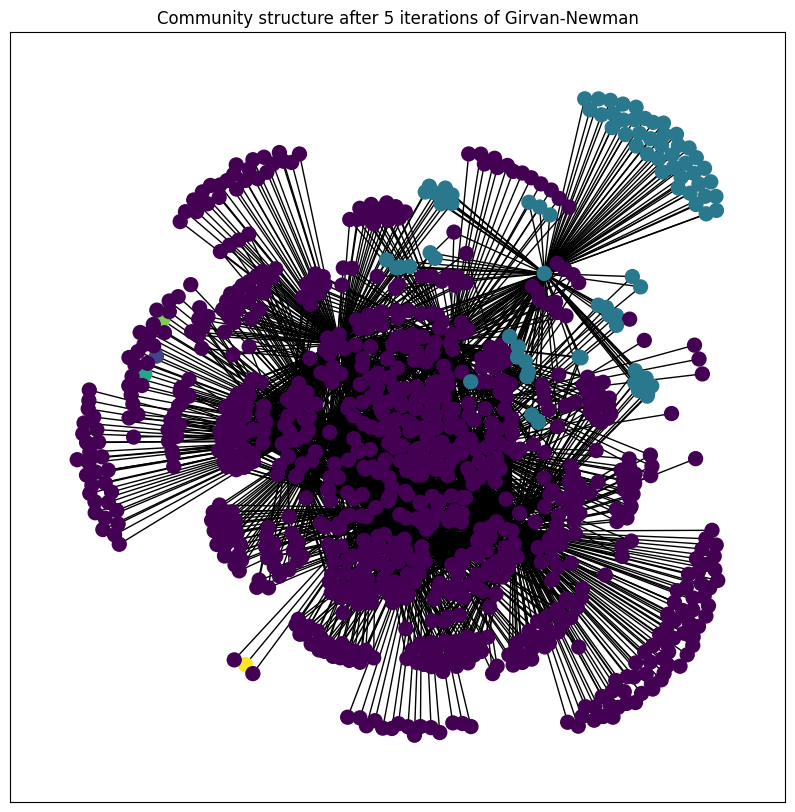

In [62]:
# 创建每个节点的社区映射字典
community_map = {node: cid for cid, community in enumerate(final_communities) for node in community}
colors = [community_map[node] for node in G.nodes()]

# 绘制网络图
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos, node_color=colors, with_labels=False, node_size=100, cmap=cm.get_cmap('viridis'))
plt.title('Community structure after 5 iterations of Girvan-Newman')
plt.show()

In [63]:
# 打印每个社区的成员和边
for i, community in enumerate(final_communities):
    print(f"Community {i}:")
    subgraph = G.subgraph(community)
    print("Nodes:", subgraph.nodes())
    print("Edges:", subgraph.edges())


Community 0:
Nodes: ['ylecun', 'giffmana', 'karpathy', 'AndrewYNg', 'sama', 'JohnCena', 'Perimeter', 'goodfellow_ian', 'drfeifei', 'ScienceMagazine', 'BarackObama', 'theNASEM', 'RogueNASA', 'RoguePOTUSStaff', 'eosnos', 'karaswisher', 'mustafasuleyman', 'CSETGeorgetown', 'clarifai', 'kaifulee', 'smithmegan', 'KamalaHarris', 'JoeBiden', 'ScienceNews', 'ScottGottliebMD', 'washingtonpost', 'IMFNews', 'thehill', 'smithsonian', 'NASA_Technology', 'EricLander46', 'NASAhistory', 'demishassabis', 'MichelleObama', 'haldaume3', 'rsalakhu', 'KofmanMichael', 'politico', 'AP_Politics', 'POTUS44', 'WhiteHouse45', 'BretWeinstein', 'vgcerf', 'ddale8', 'SteveCase', 'mehdirhasan', 'VogelMiriam', 'TheStudyofWar', 'iclr_conf', 'SenSanders', 'BernieSanders', 'Pontifex', 'GaryMarcus', 'USATODAY', 'lukeprog', 'typesfast', 'ev', 'ShouldHaveCat', 'Teknium1', 'michellemalkin', 'lmsysorg', 'roydanroy', 'geoffreyhinton', 'SandraWachter5', 'gaberivera', 'WhiteHouse', 'rasbt', 'fchollet', 'AndrewYang', 'mojombo', '_

In [65]:
import networkx as nx
from networkx.algorithms.community import girvan_newman
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 假设 G 是已经构建好的图
communities_generator = girvan_newman(G)

# 定义一个列表来存储每个迭代步骤的社区
community_levels = []

# 最多迭代5次
for level in range(7):
    try:
        # 每次迭代产生的社区
        communities = next(communities_generator)
        community_levels.append(communities)
        print(f"Iteration {level + 1}: Number of communities = {len(communities)}")
    except StopIteration:
        print("No more splits possible.")
        break

# 可视化最后一次迭代的社区划分结果
final_communities = community_levels[-1]
sorted_communities = sorted(map(sorted, final_communities))
print(f"Final communities: {sorted_communities}")

Iteration 1: Number of communities = 2
Iteration 2: Number of communities = 3
Iteration 3: Number of communities = 4
Iteration 4: Number of communities = 5
Iteration 5: Number of communities = 6
Iteration 6: Number of communities = 7
Iteration 7: Number of communities = 8
Final communities: [['7homaslin', 'ABC', 'ACLU', 'AINowInstitute', 'AMD', 'AOC', 'AP_Politics', 'APompliano', 'ARKInvest', 'AVindman', 'AdamMGrant', 'AjdDavison', 'AlecRad', 'AlexAlahi', 'AmandaAskell', 'AndrewYNg', 'AndrewYang', 'AravSrinivas', 'ArthurGretton', 'BBCNews', 'BBCWorld', 'BW', 'BachFrancis', 'BaiduResearch', 'BarackObama', 'BenMildenhall', 'Benioff', 'BernieSanders', 'BillClinton', 'BillGates', 'BillNye', 'Bill_Gross', 'Bob_Wachter', 'BorisMPower', 'BotJunkie', 'BretWeinstein', 'CACMmag', 'CAIS_USC', 'CBSNews', 'CDCgov', 'CGTNOfficial', 'CNBC', 'CSDatCMU', 'CSETGeorgetown', 'CVPR', 'CadeMetz', 'CaimingXiong', 'CarnegieMellon', 'Casey', 'CaseyNewton', 'CatClifford', 'CathieDWood', 'Channel4News', 'ChrSzeg

In [66]:
# 打印每个社区的成员和边
for i, community in enumerate(final_communities):
    print(f"Community {i}:")
    subgraph = G.subgraph(community)
    print("Nodes:", subgraph.nodes())
    print("Edges:", subgraph.edges())

Community 0:
Nodes: ['ylecun', 'giffmana', 'karpathy', 'AndrewYNg', 'sama', 'Perimeter', 'goodfellow_ian', 'drfeifei', 'ScienceMagazine', 'BarackObama', 'theNASEM', 'RogueNASA', 'RoguePOTUSStaff', 'eosnos', 'karaswisher', 'mustafasuleyman', 'CSETGeorgetown', 'clarifai', 'kaifulee', 'smithmegan', 'KamalaHarris', 'JoeBiden', 'ScienceNews', 'ScottGottliebMD', 'washingtonpost', 'IMFNews', 'thehill', 'smithsonian', 'NASA_Technology', 'EricLander46', 'NASAhistory', 'demishassabis', 'haldaume3', 'rsalakhu', 'KofmanMichael', 'politico', 'AP_Politics', 'POTUS44', 'WhiteHouse45', 'BretWeinstein', 'vgcerf', 'ddale8', 'SteveCase', 'mehdirhasan', 'VogelMiriam', 'TheStudyofWar', 'iclr_conf', 'SenSanders', 'BernieSanders', 'Pontifex', 'GaryMarcus', 'USATODAY', 'lukeprog', 'typesfast', 'ev', 'ShouldHaveCat', 'Teknium1', 'michellemalkin', 'lmsysorg', 'roydanroy', 'geoffreyhinton', 'SandraWachter5', 'gaberivera', 'WhiteHouse', 'rasbt', 'fchollet', 'AndrewYang', 'mojombo', '_jongwook_kim', 'jovialjoy', '

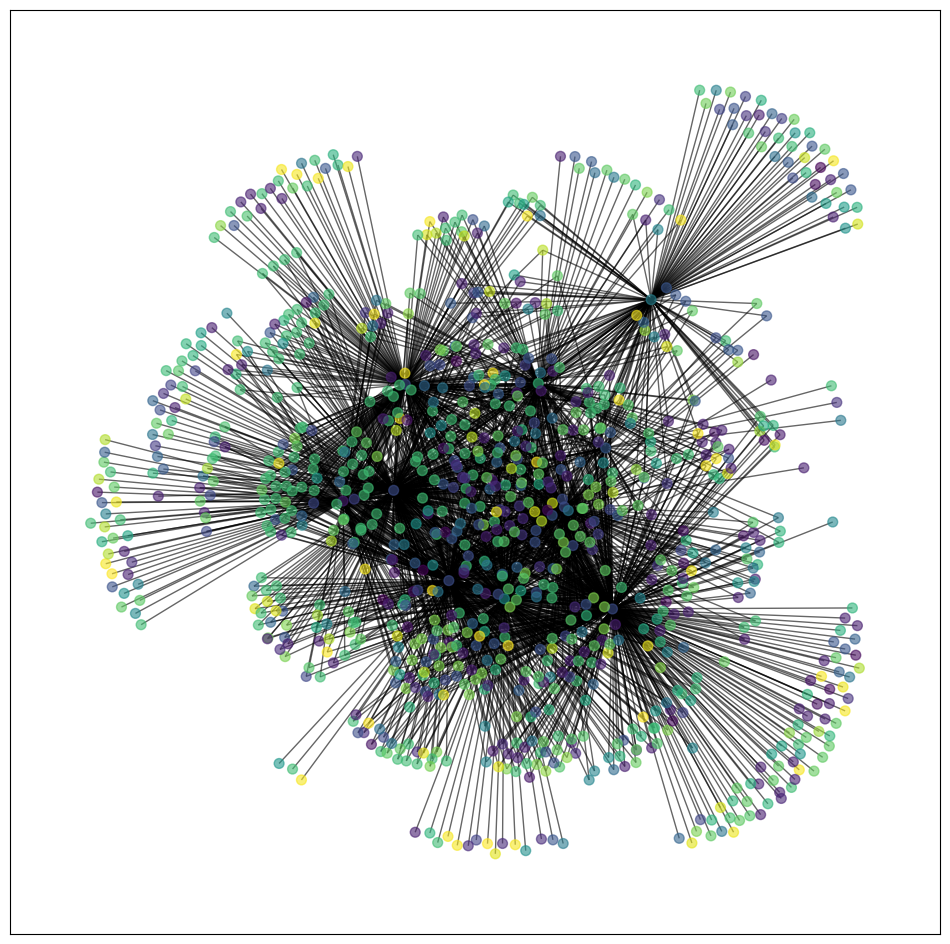

In [67]:
# 节点颜色映射
color_map = {loc: i for i, loc in enumerate(set(nx.get_node_attributes(G, 'location').values()))}
colors = [color_map[G.nodes[node]['location']] for node in G]

# 可视化网络
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos, node_color=colors, cmap=plt.get_cmap('viridis'), node_size=50, alpha=0.6, with_labels=False)
plt.show()


使用 location 属性对节点进行颜色编码，这可以帮助在可视化时快速识别不同位置的节点。这样可以直观地看出不同地区的影响者和粉丝的分布情况。